In [1]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carregando a ABT

In [ ]:
# carrega a abt
df_abt = pd.read_csv('/content/drive/MyDrive/projeto-ia-codigos/projeto-ia-aula8/propensao_revenda_abt (1).csv')

# pega a base de treinamento
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# pega a base de avaliação (out of time)
df_oot   = df_abt.query('data_ref_safra == "2018-03-01"')

# Identificando as Variáveis de Modelagem

In [ ]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# dados de treinamento
X_train = df_train[features]
y_train = df_train[target]

# dados de avaliação (out of time)
X_oot = df_oot[features]
y_oot = df_oot[target]

# Regressão Logística

In [ ]:
!pip install feature-engine==1.0.2

     |████████████████████████████████| 153kB 5.5MB/s 
     |████████████████████████████████| 9.5MB 5.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)), 
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())), 
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', LogisticRegression(random_state=42))
])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(estimator=lr_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
lr_model_results = pd.DataFrame(cv_results)

In [ ]:
accuracy = lr_model_results.mean().loc['test_accuracy']
precision = lr_model_results.mean().loc['test_precision']
recall = lr_model_results.mean().loc['test_recall']
f1 = lr_model_results.mean().loc['test_f1']
roc_auc = lr_model_results.mean().loc['test_roc_auc']

In [ ]:
# criando uma tabela vazia que irá conter os resultados dos modelos
df_metrics = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [],'roc_auc': []}
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc


In [ ]:
# populando a tabela com os resultados da regressão logística
df_metrics['model'].append('Logistic Regression')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.65692,0.741007,0.898444


# Support Vector Machine - SVM

In [ ]:
from sklearn.svm import SVC

svm_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)), 
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())), 
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', SVC(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=svm_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
svm_model_results = pd.DataFrame(cv_results)
svm_model_results

NameError: ignored

In [ ]:
accuracy = svm_model_results.mean().loc['test_accuracy']
precision = svm_model_results.mean().loc['test_precision']
recall = svm_model_results.mean().loc['test_recall']
f1 = svm_model_results.mean().loc['test_f1']
roc_auc = svm_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('Support Vector Machine')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', DecisionTreeClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=tree_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
tree_model_results = pd.DataFrame(cv_results)
tree_model_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.068316,0.060873,0.775393,0.696429,0.730337,0.712980,0.766789
1,0.076441,0.067552,0.751073,0.666667,0.696629,0.681319,0.740676
2,0.071746,0.060340,0.789700,0.726236,0.718045,0.722117,0.775882
3,0.064137,0.059532,0.765379,0.702381,0.665414,0.683398,0.746102
4,0.045459,0.038809,0.799714,0.728261,0.755639,0.741697,0.791214


In [ ]:
accuracy = tree_model_results.mean().loc['test_accuracy']
precision = tree_model_results.mean().loc['test_precision']
recall = tree_model_results.mean().loc['test_recall']
f1 = tree_model_results.mean().loc['test_f1']
roc_auc = tree_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('Decision Tree')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', RandomForestClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=rf_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
rf_model_results = pd.DataFrame(cv_results)
rf_model_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.671371,0.134418,0.831187,0.801619,0.741573,0.770428,0.915895
1,0.657776,0.134465,0.836910,0.800000,0.764045,0.781609,0.904403
2,0.634600,0.144145,0.835479,0.803213,0.751880,0.776699,0.904500
3,0.644463,0.128286,0.819742,0.775591,0.740602,0.757692,0.907947
4,0.399059,0.076770,0.859800,0.813433,0.819549,0.816479,0.928116


In [ ]:
accuracy = rf_model_results.mean().loc['test_accuracy']
precision = rf_model_results.mean().loc['test_precision']
recall = rf_model_results.mean().loc['test_recall']
f1 = rf_model_results.mean().loc['test_f1']
roc_auc = rf_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('Random Forest')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', GradientBoostingClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=gb_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
gb_model_results = pd.DataFrame(cv_results)

In [ ]:
accuracy = gb_model_results.mean().loc['test_accuracy']
precision = gb_model_results.mean().loc['test_precision']
recall = gb_model_results.mean().loc['test_recall']
f1 = gb_model_results.mean().loc['test_f1']
roc_auc = gb_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('Gradient Boosting')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172
4,Gradient Boosting,0.832904,0.789713,0.765771,0.777198,0.907262


# Xtreme Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier

xgb_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', XGBClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=xgb_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
xgb_model_results = pd.DataFrame(cv_results)

In [ ]:
accuracy = xgb_model_results.mean().loc['test_accuracy']
precision = xgb_model_results.mean().loc['test_precision']
recall = xgb_model_results.mean().loc['test_recall']
f1 = xgb_model_results.mean().loc['test_f1']
roc_auc = xgb_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('XGBoosting')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172
4,Gradient Boosting,0.832904,0.789713,0.765771,0.777198,0.907262
5,XGBoosting,0.830329,0.787929,0.759759,0.773019,0.906131


# Light Gradient Boosting (LGBM)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', LGBMClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=lgbm_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
lgbm_model_results = pd.DataFrame(cv_results)

In [ ]:
accuracy = lgbm_model_results.mean().loc['test_accuracy']
precision = lgbm_model_results.mean().loc['test_precision']
recall = lgbm_model_results.mean().loc['test_recall']
f1 = lgbm_model_results.mean().loc['test_f1']
roc_auc = lgbm_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('LGBM')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172
4,Gradient Boosting,0.832904,0.789713,0.765771,0.777198,0.907262
5,XGBoosting,0.830329,0.787929,0.759759,0.773019,0.906131
6,LGBM,0.840343,0.798913,0.777027,0.787583,0.908755


# Catboost

In [ ]:
# !pip install catboost==0.25.1

In [ ]:
from catboost import CatBoostClassifier

cat_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', CatBoostClassifier(random_state=42))
])

In [ ]:
cv_results = cross_validate(estimator=cat_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
cat_model_results = pd.DataFrame(cv_results)

In [ ]:
accuracy = cat_model_results.mean().loc['test_accuracy']
precision = cat_model_results.mean().loc['test_precision']
recall = cat_model_results.mean().loc['test_recall']
f1 = cat_model_results.mean().loc['test_f1']
roc_auc = cat_model_results.mean().loc['test_roc_auc']

In [ ]:
df_metrics['model'].append('CatBoost')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [ ]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172
4,Gradient Boosting,0.832904,0.789713,0.765771,0.777198,0.907262
5,XGBoosting,0.830329,0.787929,0.759759,0.773019,0.906131
6,LGBM,0.840343,0.798913,0.777027,0.787583,0.908755
7,CatBoost,0.844349,0.808937,0.774768,0.791190,0.913409


In [ ]:
df_metrics_results = pd.DataFrame(df_metrics)

In [ ]:
df_metrics_results.sort_values(by='roc_auc', ascending=False)

,model,accuracy,precision,recall,f1,roc_auc
7,CatBoost,0.844349,0.808937,0.774768,0.791190,0.913409
3,Random Forest,0.836624,0.798771,0.763530,0.780582,0.912172
6,LGBM,0.840343,0.798913,0.777027,0.787583,0.908755
4,Gradient Boosting,0.832904,0.789713,0.765771,0.777198,0.907262
5,XGBoosting,0.830329,0.787929,0.759759,0.773019,0.906131
0,Logistic Regression,0.825179,0.850291,0.656920,0.741007,0.898444
1,Support Vector Machine,0.829757,0.822120,0.707209,0.759838,0.891748
2,Decision Tree,0.776252,0.703995,0.713213,0.708302,0.764132


O modelo campeão é o CatBoost!

# Avaliando na base OOT

In [ ]:
# treinando o modelo campeão na base de treino completa
cat_model.fit(X_train, y_train)

In [ ]:
y_pred_oot = cat_model.predict(X_oot)
y_proba_oot = cat_model.predict_proba(X_oot)[:,1]

## Construindo a Curva ROC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f"ROC-AUC: {roc_auc_oot:.3f}")

ROC-AUC: 0.922


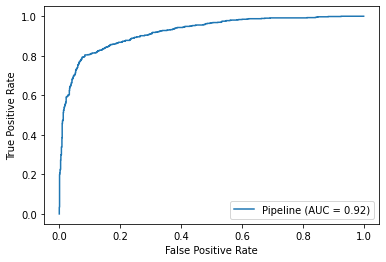

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(cat_model, X_oot, y_oot)

## Construindo a Matriz de Confusão

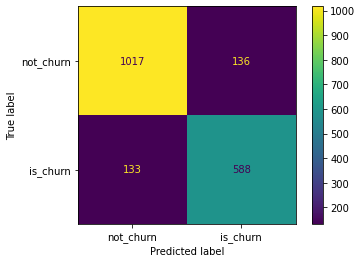

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(cat_model, X_oot, y_oot, values_format='d', display_labels=['not_churn', 'is_churn'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_oot  = accuracy_score(y_oot, y_pred_oot)
precision_oot = precision_score(y_oot, y_pred_oot)
recall_oot    = recall_score(y_oot, y_pred_oot)
f1_oot        = f1_score(y_oot, y_pred_oot)

print(f"Accuracy OOT: {accuracy_oot:.3f}")
print(f"Precision OOT: {precision_oot:.3f}")
print(f"Recall OOT: {recall_oot:.3f}")
print(f"F1: {f1_oot:.3f}")

Accuracy OOT: 0.856
Precision OOT: 0.812
Recall OOT: 0.816
F1: 0.814


# Explicando o Modelo

## Shap Values

Shap Values é um método agnóstico de explicação de modelos, especialmente utilizado para interpretar modelos considerados "black box", como os modelos baseados em árvores (random forest, xgboost, lightgbm, catboost).

In [2]:
!pip install shap

     |████████████████████████████████| 358kB 15.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=4d2b805f41c60db18e00f86cbd131abe6585bbd5c1ec58e2e203321fa2285c94
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
import shap

In [4]:
explainer = shap.TreeExplainer(cat_model[-1])

NameError: ignored

In [ ]:
X_oot_transformado = cat_model[:-1].transform(X_oot)

In [ ]:
shap_values = explainer.shap_values(X_oot_transformado)

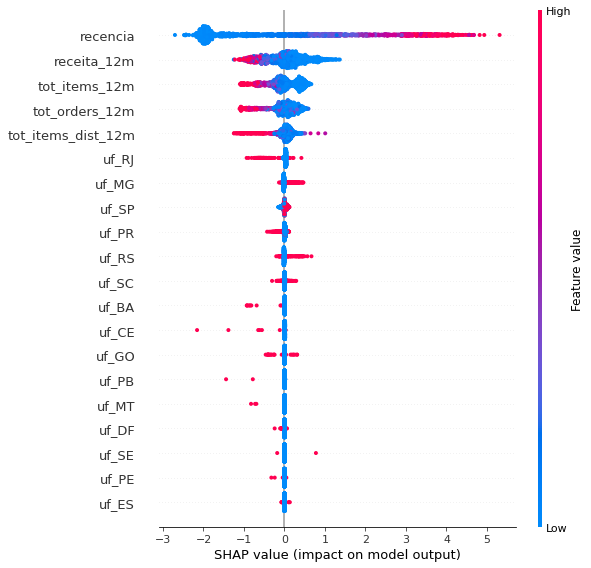

In [ ]:
shap.summary_plot(shap_values, X_oot_transformado)

As variáveis estão ordenadas de cima para baixo em ordem de importância para o modelo.

Olhando para a variável mais importante, `recencia`, quanto maior o seu valor, maior será o impacto positivo na saída do modelo. Em outra palavras, quanto maior a `recencia`, maior será a propensão a não revender!

Interpretação para a segunda variável mais importante `receita_12m`: quanto menor a `receita_12m`, maior a propensão de não revender!


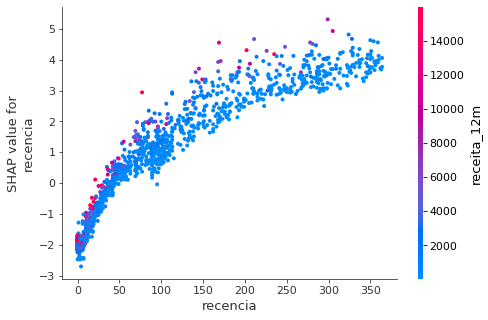

In [ ]:
shap.dependence_plot('recencia', shap_values, X_oot_transformado, interaction_index='receita_12m')

Quanto maior a `recência` e menor a `receita_12m`, maior a propensão de não revender.

Podemos também criar cutoff para trigar uma comunicação. Por exemplo acima de 50 dias de `recencia`, o seller já entra na região de grande chance de não revender. Podemos então entrar em contato para reter o seller quando a `recencia` do mesmo for maior ou igual a 50 dias.

# Salvando o Modelo Para Uso Posterior

In [ ]:
import joblib
joblib.dump(cat_model, '/content/drive/MyDrive/projeto-ia-datasets/olist/output/catboost_model_20210414.pkl')

['/content/drive/MyDrive/projeto-ia-datasets/olist/output/catboost_model_20210414.pkl']